In [2]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [3]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(data.shape)

(1338, 7)


In [5]:
# пропуски
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# типы данных
display(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# категории необходимо перекодировать
# кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
# оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [9]:
# Выделим факторы и целевой признак в отдельные таблицы:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

---

Задание 6.1
Разделите набор данных на тренировочную и тестовую выборки в соотношении 80/20. Воспользуйтесь функцией train_test_split.

В качестве значения параметра random_state укажите число 42.

Чему равно количество наблюдений в тестовом наборе данных?

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_test.shape[0])

268


Задание 6.2
Обучите модель линейной регрессии аналитическим методом (LinearRegression) на тренировочном наборе данных. Все параметры оставьте по умолчанию.

Чему равен свободный член (intercept) обученной модели? Ответ округлите до сотых.

In [14]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
print(f'intercept = {lr.intercept_.round(2)}')

intercept = -12390.8


Задание 6.3
С помощью модели, полученной в предыдущем задании, сделайте предсказание на тренировочной и тестовой выборке. Рассчитайте следующие три метрики: R2, MAE, MAPE. Не забудьте привести значение MAPE к процентам.

Значение R2 округлите до трёх знаков после точки-разделителя, а значения MAE и MAPE — до целого числа.

In [21]:
# делаем предсказания
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print(f'Train R2 = {metrics.r2_score(y_train, y_train_predict).round(3)}')
    print(f'Train MAE = {metrics.mean_absolute_error(y_train, y_train_predict).round()}')
    print(f'Train MAPE = {round(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100)}')
    print('\n')
    print(f'Test R2 = {metrics.r2_score(y_test, y_test_predict).round(3)}')
    print(f'Test MAE = {metrics.mean_absolute_error(y_test, y_test_predict).round()}')
    print(f'Test MAPE = {round(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100)}')
    
print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R2 = 0.742
Train MAE = 4208.0
Train MAPE = 42


Test R2 = 0.784
Test MAE = 4181.0
Test MAPE = 47


Задание 6.4
Постройте диаграмму boxplot для визуализации ошибок модели линейной регрессии на тренировочной и тестовой выборках. В качестве ошибки возьмите разницу между истинным ответом и предсказанием (без модуля).

Text(0, 0.5, 'Model')

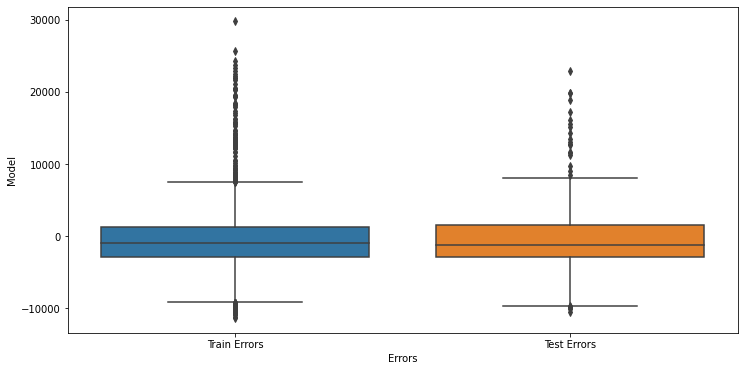

In [22]:
# ошибки модели на тренировочной выборке:
y_train_errors = y_train - y_train_predict
# ошибки на тустовой выборке:
y_test_errors = y_test - y_test_predict

# для визуализации трансформируем ошибки в датафрейм
errors_df = pd.DataFrame(
    {'Train Errors': y_train_errors,
     'Test Errors': y_test_errors
     }
)
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=errors_df, ax=ax)
ax.set_xlabel('Errors')
ax.set_ylabel('Model')

Задание 6.5
Нормализуйте тренировочную и тестовую выборки с помощью min-max-нормализации (MinMaxScaler). Расчёт параметров нормализации (fit) произведите на тренировочной выборке.
На нормализованных данных сгенерируйте полиномиальные признаки степени 2. Воспользуйтесь классом PolynomialFeatures из библиотеки sklearn. Значение параметра include_bias выставите на False.

Чему равно результирующее количество столбцов?

In [24]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)

X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print(X_train_scaled_poly.shape[1])

54


Задание 6.6
Обучите модель линейной регрессии на полиномиальных признаках.

Чему равно значение метрики R2 на тестовой выборке?

Значение R2 округлите до трёх знаков после запятой.

In [25]:
lr.fit(X_train_scaled_poly, y_train)

y_train_predict_poly = lr.predict(X_train_scaled_poly)
y_test_predict_poly = lr.predict(X_test_scaled_poly)

print(f'Test R2 = {metrics.r2_score(y_test, y_test_predict_poly).round(3)}')

Test R2 = 0.866


Задание 6.7
Выведите значения коэффициентов полученной модели. Посмотрите на степени коэффициентов.

Какой вывод можно сделать?

Значения коэффициентов очень высокие, модель неустойчива, необходима регуляризация.
Значения коэффициентов приемлемые, модель устойчива, регуляризация не нужна.

In [28]:
lr.coef_
# Значения коэффициентов очень высокие, модель неустойчива, необходима регуляризация

array([ 3.28425930e+16,  5.24092415e+15, -3.54274027e+15,  5.56107133e+15,
       -4.36104954e+15, -4.32544728e+15, -1.27568697e+17, -1.54961145e+16,
       -5.06580635e+16,  8.44000000e+03,  8.78000000e+02,  8.20000000e+02,
       -1.73200000e+03,  1.84000000e+02, -3.28425930e+16, -3.28425930e+16,
       -3.28425930e+16, -3.28425930e+16, -5.62830332e+16,  7.20250000e+02,
       -1.29050000e+03,  2.70000000e+02,  5.10421091e+16,  5.10421091e+16,
        5.10421091e+16,  5.10421091e+16, -9.74062500e+03,  1.60400000e+03,
        5.48413125e+04,  3.54274027e+15,  3.54274027e+15,  3.54274027e+15,
        3.54274027e+15, -2.08000000e+03, -2.18400000e+03, -5.56107133e+15,
       -5.56107133e+15, -5.56107133e+15, -5.56107133e+15, -2.08317967e+15,
        6.44422921e+15,  6.44422921e+15,  6.44422921e+15,  6.44422921e+15,
       -1.82552363e+16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.04988013e+17,  0.00000000e+00,  0.00000000e+00, -7.08456908e+15,
        0.00000000e+00,  

Задание 6.8
Постройте линейную регрессию с L1-регуляризацией (Lasso) на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию, параметр max_iter установите в значение 2000.

Чему равны метрики R2, MAE и MAPE на тестовой выборке?

Посмотрите на степени параметров модели после регуляризации. Сделайте вывод для себя.

In [29]:
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
lasso_lr_poly.fit(X_train_scaled_poly, y_train)

y_train_predict_lasso = lasso_lr_poly.predict(X_train_scaled_poly)
y_test_predict_lasso = lasso_lr_poly.predict(X_test_scaled_poly)

print(f'Test R2 = {metrics.r2_score(y_test, y_test_predict_lasso).round(3)}')
print(f'Test MAE = {metrics.mean_absolute_error(y_test, y_test_predict_lasso).round()}')
print(f'Test MAPE = {round(metrics.mean_absolute_percentage_error(y_test, y_test_predict_lasso)*100)}')
print(lasso_lr_poly.coef_)

Test R2 = 0.867
Test MAE = 2719.0
Test MAPE = 30
[ 3.24221653e+03 -4.92313816e+02  5.07612317e+03  4.58362056e+03
  1.97928569e+03  1.88025707e+02 -4.70775218e+02  5.83657101e+02
 -2.43543456e+02  8.29826751e+03  7.74581954e+02  8.44448593e+02
 -1.20775688e+03  1.34809915e+02 -1.04309726e+03 -0.00000000e+00
  1.16964229e+03  1.61765564e+03 -0.00000000e+00  5.05847740e+02
 -1.13425152e+03  2.65796922e+02 -1.22240479e+03  0.00000000e+00
  2.36213242e+02 -5.80031340e+02 -8.17963257e+03  1.29487768e+03
  5.47148553e+04  3.58531873e+03  2.40690210e+03 -9.63549427e+02
  0.00000000e+00 -1.67464337e+03 -2.05436459e+03  1.94204864e+03
  1.95394442e+03 -0.00000000e+00 -1.06364416e+03  8.00606774e+00
  5.93688978e+02 -0.00000000e+00 -2.30643423e+02  1.97933477e+03
  6.31615519e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.05849873e-01]


Задание 6.9
Постройте линейную регрессию с L2-регуляризацией на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию.

Чему равны метрики R2, MAE и MAPE на тестовой выборке?

Значение R2 округлите до трёх знаков после запятой, а значения MAE и MAPE до целого числа.

In [31]:
ridge_lr_poly = linear_model.Ridge()
ridge_lr_poly.fit(X_train_scaled_poly, y_train)

y_train_predict_ridge = ridge_lr_poly.predict(X_train_scaled_poly)
y_test_predict_ridge = ridge_lr_poly.predict(X_test_scaled_poly)

print(f'Test R2 = {metrics.r2_score(y_test, y_test_predict_ridge).round(3)}')
print(f'Test MAE = {metrics.mean_absolute_error(y_test, y_test_predict_ridge).round()}')
print(f'Test MAPE = {round(metrics.mean_absolute_percentage_error(y_test, y_test_predict_ridge)*100)}')

Test R2 = 0.863
Test MAE = 2861.0
Test MAPE = 31
